<a href="https://colab.research.google.com/github/ywei6056/Intro.-Experimental-Physics-I-NYU/blob/main/LabAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Data entry
In the cell below, please type in your results from your lab book. For instance, hand_c would have the 10 measurements of the period you made by counting one swing by hand by method c, while platform_c would have the automated measurements you made using method c'

I ask you to reenter hand_c because you'll use that for comparison later. You can cut and paste from your LabAnalysis1 if you want. 

In [ ]:
from numpy.core.fromnumeric import size
hand_c = np.array([2.1200, 2.1212, 2.1206, 2.1203, 2.1190, 2.1214, 2.1208, 2.1206]) #measurements made by hand, method C

platform_a = np.array([2.078, 2.078, 2.079, 2.074, 2.078, 2.079, 2.082, 2.080, 2.081, 2.083, 2.077, 2.076, 2.076, 2.079, 2.081, 2.078, 2.078, 2.080, 2.083, 2.078]) #measurements made using platform, method A
#print(size(platform_a))
platform_b = np.array([2.0791, 2.0789, 2.0765, 2.0777, 2.0779, 2.0768, 2.0782, 2.0769, 2.0767, 2.0762]) #measurements made using platform, method B
#print(size(platform_b))
platform_c = np.array([51.934, 51.928, 51.943, 51.941, 51.945, 51.942, 51.947, 51.945, 51.943, 51.944]) #measurements made using platform, method C'
platform_c = platform_c/25
#print(platform_c)
#print(size(platform_c))

delta_length = np.array([0,-1,-2,0,1,2,0]) #length change in mm
period_vs_length = np.array([[103.897, 103.878, 103.878, 103.881, 103.879], [103.804, 103.819, 103.817, 103.823, 103.819], [103.763, 103.781, 103.780, 103.778, 103.791],[103.866, 103.868, 103.876, 103.867, 103.874],[103.934, 103.919, 103.934, 103.914, 103.936],[103.975, 103.971, 103.968, 103.991, 103.977],[103.886, 103.857, 103.862, 103.853, 103.863]]) #measurements for each of the 7 conditions above; I didn't convert to array, because you might have a different number of measurements for each length change
#print(period_vs_length[0])
#print(type(period_vs_length[0]))
#print(type(period_vs_length))


## Analysis of platform measurements
1. Calculate the mean ($\mu$), standard deviation ($\sigma$), and standard error of the mean (s.e.m.) for hand measurement C and for each of your platfor measurements A-C'. Use 1/(N-1) to calculate the standard deviation. Print these out as a table.
2. Plot the standard deviation vs. the number of periods counted, using circle markers connected with a line. 
3. Make an error plot with the x axis representing the measurement set (1 = A, 2 = B, 3 = C') and the mean and s.e.m. as the y center and error range respectively. Don't connect the markers with a line. Set the X-ticks to be 1,2,3. If you are fancy, you can change the X-tick labels from 1,2,3 to 1,10,25. But you don't have to. 
4.  Make a histogram showing all 3 measurement sets in different colors. Use 20 bins spanning the range between $\mu_{C'} - 3\sigma_A$ and $\mu_{C'} + 3\sigma_A$. Add a legend to your plot to explain which color goes with which data set. 

Method        Mean(seconds)    Standard Deviation    Standard Error
----------  ---------------  --------------------  ----------------
Hand C              2.12049           0.000751071       0.000265544
Platform A          2.0789            0.00233734        0.000522645
Platform B          2.07749           0.00102138        0.00032299
Platform C          2.07765           0.000232322       7.34665e-05


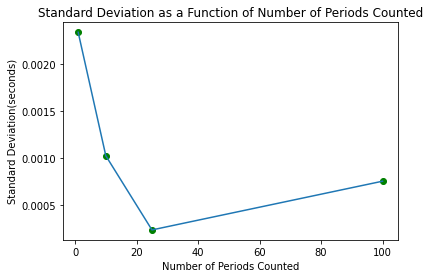

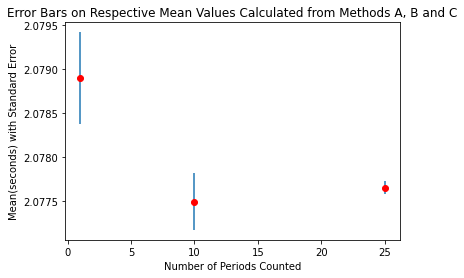

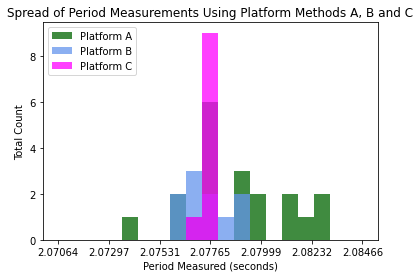

Ticks in the spread histogram are spaced in one standard deviation (method A) increments.


In [ ]:
#1
def mean(input):
  N = np.size(input)
  total = sum(input)
  mean = total/N
  return(mean)

mean_handC = mean(hand_c)
mean_A = mean(platform_a)
mean_B = mean(platform_b)
mean_C = mean(platform_c)

def sigma(input):
  N = np.size(input)
  u = mean(input)
  variance = []
  for i in input:
    variance.append((i-u)**2)
  sum_variance = sum(variance)

  sigma = np.sqrt((sum_variance)/(N-1))
  return(sigma)

sigma_handC = sigma(hand_c)
sigma_A =sigma(platform_a)
sigma_B = sigma(platform_b)
sigma_C=sigma(platform_c)

def SEM(input):
  SD = sigma(input)
  N = np.size(input)
  SEM = (SD/np.sqrt(N))
  return(SEM)

SEM_handC=SEM(hand_c)
SEM_A=SEM(platform_a)
SEM_B=SEM(platform_b)
SEM_C=SEM(platform_c)

from tabulate import tabulate
table1 = {'Method':['Hand C', 'Platform A','Platform B','Platform C'], 'Mean(seconds)':[(mean_handC), (mean_A),(mean_B),(mean_C)], 'Standard Deviation':[(sigma_handC),(sigma_A),(sigma_B),(sigma_C)],'Standard Error':[(SEM_handC),(SEM_A),(SEM_B),(SEM_C)]}
print(tabulate(table1,headers = 'keys'))


#2
x= [1,10,25,100]
y= [sigma_A, sigma_B, sigma_C, sigma_handC]
plt.plot(x,y,'go')
plt.plot(x,y)
plt.xlabel('Number of Periods Counted')
plt.ylabel('Standard Deviation(seconds)')
plt.title('Standard Deviation as a Function of Number of Periods Counted')
plt.show()


#3
import statistics as st
x = (1,10,25)
y = [mean_A, mean_B, mean_C]
error = [SEM_A, SEM_B, SEM_C]
plt.plot(x,y, 'ro')
plt.errorbar(x,y, yerr = error, fmt = ' ')

plt.xlabel('Number of Periods Counted')
plt.ylabel('Mean(seconds) with Standard Error')
plt.title('Error Bars on Respective Mean Values Calculated from Methods A, B and C')
plt.show()


#4
a =mean_C - 3*sigma_A
b =mean_C + 3*sigma_A
r = np.linspace(a,b,20)

plt.hist([platform_a], bins=r, label='Platform A', color='darkgreen', alpha=.75)
plt.hist([platform_b], bins=r, label='Platform B', color='cornflowerblue', alpha=0.75)
plt.hist([platform_c], bins=r, label='Platform C', color='fuchsia', alpha=0.75)
plt.legend(loc='upper left')
plt.xticks(np.arange(a,b, sigma_A))
plt.title('Spread of Period Measurements Using Platform Methods A, B and C')
plt.xlabel('Period Measured (seconds)')
plt.ylabel('Total Count')
plt.show()
print('Ticks in the spread histogram are spaced in one standard deviation (method A) increments.')



##Questions - Please type your answers in here directly

1. Are your measurements A-C' consistent with each other? Explain why or why not; if they are not consistent, what does this mean? 
**Answer:** No, they are not actually consistent with one another. Although the mean of Method C is within the STDError range of Method B, the entirety of Method B (its mean and the range of its STDError) does not fall within the STDError range of data from Method A. I'm not quite sure what happened -- my intuitive guess is that, the measurements are so precise, and the spread of our mean so small, that a slight variation from methods A and B messed up our data?

(Or, it could be that I released the pendulums for Method A, and Troy, who does a much better job, released the pendulum for Method B and the rest.)

2. How does the error (standard deviation) of a single measurement scale with the number of periods counted? 
**Answer:** The standard deviation decreases as more numbers of periods are being counted.

3. How much more precise are the platform measurements than the hand measurements? 
**Answer:** All of our standard deviations and standard errors for A,B,C are *orders of magnitudes* smaller than their counterparts calculated using data we got by hand in Lab 1. For example, sigma_A(by hand) was 0.0637924, and sigma_A(by platform) is 0.00233734.

4. Evaluate the following argument, being as quantitative as you can: "The platform measurements aren't more precise - they are just faster. If I wanted to get the same level of precision using the hand counter, I could just count more periods."
**Answer:** The argument is true. The student is saying that the hand measurements can get to the same level of precision with more periods counted during every measurement, as the platform measurements with simply less periods counted per measurement. This makes sense, since higher number of periods being counted very count 'spreads out' the inprecision in our human act of checking the precise time with *every* measurement (i.e. when we measure 100 periods per measurement, we take the roughly 212 seconds, plus the roughly 3 significant figures *after* the decimal place, and divide this number by 100 to get the length of one period. This means we have 1 more significant digit than when we do 10 periods-per-measurement, and also that, say if there is a 1-second variation in our looking at the stopwatch, it gets divided by 100 as well). The statement also makes sense if we check that the standard deviation in hand method C is 0.000751071, which is smaller than the standard deviation in platform method B (0.00102138).

##Analysis of displacement measurements
1. Calculate the mean ($\mu$), standard deviation ($\sigma$), and standard error of the mean (s.e.m.) for each of the 7 displacement measurements. Use 1/(N-1) to calculate the standard deviation. Print these out as a table.
2. Consider the three sets of measurements at "0" displacement. Do you think you can group them all together and treat them as measuring the same length? Either way, calculate the mean ($\mu$), standard deviation ($\sigma$), and standard error of the mean (s.e.m.) for the "0" displacement measurements, taken together.
3. Make an error plot of period vs. displacement. Use the s.e.m. for the y-error bars. Extra fancy (optional): add x-error bars representing how much uncertainty you think there is in your adjustment of the position (1 full turn = 1 mm, so 1/4 turn would be 250 $\mu$m and 1/12 turn (the difference between noon and 1 on a clock) would be 83 $\mu$m.  
4. Using $T = 2\pi \sqrt{\frac{L}{g}}$,  $g = 9.802$, and the mean of the 0 displacement measurements of the period $T$, calculate the length at 0 displacement. Now predict the period in the range of -2 to 2 mm above and below this length and plot this prediction over your data with a black dashed line. *(Note: this is not the best way to fit the length-period relation to the data, because we are only using one set of measurements (at 0 displacement). We'll learn a better way soon!)*

  Hand-Change in Length(mm) from Original:    Mean of Period(seconds)    Standard Deviation    Standard Error
------------------------------------------  -------------------------  --------------------  ----------------
                                         0                    2.07765           0.00016285        7.28286e-05
                                        -1                    2.07633           0.000145327       6.49923e-05
                                        -2                    2.07557           0.000201296       9.00222e-05
                                         0                    2.0774            8.98888e-05       4.01995e-05
                                         1                    2.07855           0.000202781       9.06863e-05
                                         2                    2.07953           0.000177539       7.93977e-05
                                         0                    2.07728           0.000256671       0.000114787
Originals 

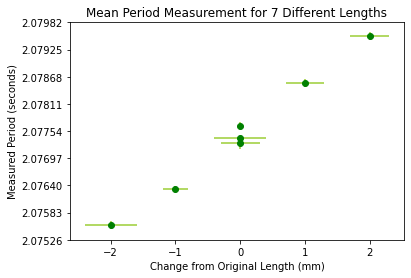

Length at Original is 1.0715556431651914 meters long.


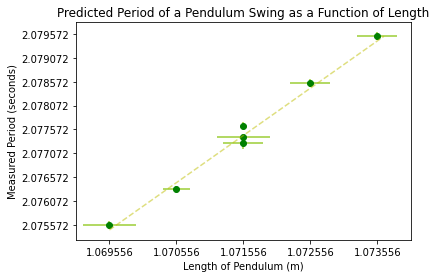

In [ ]:
from re import L
#1
#I will call them o1, m1, m2, o2, p1, p2, o3
delta_length = np.array([0,-1,-2,0,1,2,0]) #length change in mm
period_vs_length = np.array([[103.897, 103.878, 103.878, 103.881, 103.879], [103.804, 103.819, 103.817, 103.823, 103.819], [103.763, 103.781, 103.780, 103.778, 103.791],[103.866, 103.868, 103.876, 103.867, 103.874],[103.934, 103.919, 103.934, 103.914, 103.936],[103.975, 103.971, 103.968, 103.991, 103.977],[103.886, 103.857, 103.862, 103.853, 103.863]])

c=0
for i in period_vs_length:
  i = i/50
  #print(i)
  period_vs_length[c] = i
  c=c+1
  #print(c)

#Please note, this loop (to change the raw seconds measurements we recorded over 50 periods to period PER swing)
#only works if you run the program from the begining. Otherwise, it will divide whatever pre-stored values
#in the period_vs_length array by 50, over and over again.
##Nevermind, I will copy and paste the array to this cell.

def mean(input):
  N = np.size(input)
  total = sum(input)
  mean = total/N
  return(mean)

mean_o1=mean(period_vs_length[0])
mean_m1=mean(period_vs_length[1])
mean_m2=mean(period_vs_length[2])
mean_o2=mean(period_vs_length[3])
mean_p1=mean(period_vs_length[4])
mean_p2=mean(period_vs_length[5])
mean_o3=mean(period_vs_length[6])


def sigma(input):
  N = np.size(input)
  u = mean(input)
  variance = []
  for i in input:
    variance.append((i-u)**2)
  sum_variance = sum(variance)

  sigma = np.sqrt((sum_variance)/(N-1))
  return(sigma)

sigma_o1=sigma(period_vs_length[0])
sigma_m1=sigma(period_vs_length[1])
sigma_m2=sigma(period_vs_length[2])
sigma_o2=sigma(period_vs_length[3])
sigma_p1=sigma(period_vs_length[4])
sigma_p2=sigma(period_vs_length[5])
sigma_o3=sigma(period_vs_length[6])


def SEM(input):
  SD = sigma(input)
  N = np.size(input)
  SEM = (SD/np.sqrt(N))
  return(SEM)

SEM_o1=SEM(period_vs_length[0])
SEM_m1=SEM(period_vs_length[1])
SEM_m2=SEM(period_vs_length[2])
SEM_o2=SEM(period_vs_length[3])
SEM_p1=SEM(period_vs_length[4])
SEM_p2=SEM(period_vs_length[5])
SEM_o3=SEM(period_vs_length[6])

from tabulate import tabulate
Table = {'Hand-Change in Length(mm) from Original:':['0', '-1', '-2','0','1','2','0'], 'Mean of Period(seconds)':[(mean_o1), (mean_m1),(mean_m2),(mean_o2),(mean_p1),(mean_p2),(mean_o3)],'Standard Deviation':[(sigma_o1),(sigma_m1),(sigma_m2),(sigma_o2),(sigma_p1),(sigma_p2),(sigma_o3)],'Standard Error':[(SEM_o1),(SEM_m1),(SEM_m2),(SEM_o2),(SEM_p1),(SEM_p2),(SEM_o3)]}

print(tabulate(Table, headers='keys'))

#2
#ANSWER:I'm not sure. I don't think Troy and I should group all 15 measurements we took from the 3 'original' trials
#and find the mean, sigma and SEM for the group of 15, then say THOSE are accurate for the true original length.
#Because the three original trials cannot possibly be the SAME object, then I think it's better to plot
#the three mean's, sigma's and SEM's from each of the three 'original' trials and say the true original
#mean probably falls somewhere where the three error bars overlap.

original = np.concatenate((period_vs_length[0],period_vs_length[3],period_vs_length[6]))
#print(original)

mean_O = mean(original)
sigma_O=sigma(original)
SEM_O=SEM(original)
print(f'Originals Together: mean={mean_O}, standard deviation={sigma_O}, standard error of the mean={SEM_O}')

#3
x=[0,-1,-2,0,1,2,0] #in mm
y=[mean_o1, mean_m1, mean_m2, mean_o2, mean_p1, mean_p2, mean_o3]
x_error=[0,.2, .4, .4, .3, .3, .3] #in mm

y_error=[SEM_o1, SEM_m1, SEM_m2, SEM_o2, SEM_p1, SEM_p2, SEM_o3]
plt.plot(x,y,'go')
plt.errorbar(x, y, yerr=y_error, xerr=x_error, fmt= 'none', color='yellowgreen' )
plt.ylim(min(period_vs_length[2]),max(period_vs_length[5]))
step=(max(period_vs_length[5])-min(period_vs_length[2]))/8
plt.yticks(np.arange(min(period_vs_length[2]),max(period_vs_length[5])+step, step))
plt.title('Mean Period Measurement for 7 Different Lengths')
#plt.suptitle('Horizontal Error Bars = Uncertainty in Length Change, Vertical Error Bars = Standard Error(Mean)')
plt.xlabel('Change from Original Length (mm)')
plt.ylabel('Measured Period (seconds)')
plt.show()
#note: the Standard Errors for our measurements are so small that you cannot see them on the graph.



#3
g = 9.802
def L_from_T(t):
  L = ((t/(2*np.pi))**2)*g
  return(L)

L_O=L_from_T(mean_O)
print(f'Length at Original is {L_O} meters long.')


#4
x_4 = (delta_length/1000) + L_O
y_4=[mean_o1, mean_m1, mean_m2, mean_o2, mean_p1, mean_p2, mean_o3]
x_error_4=[0,.0002, .0004, .0004, .0003, .0003, .0003] #uncertainties converted to m
y_error_4=[SEM_o1, SEM_m1, SEM_m2, SEM_o2, SEM_p1, SEM_p2, SEM_o3]
plt.plot(x_4,y_4,'go')
plt.errorbar(x_4, y_4, yerr=y_error_4, xerr=x_error_4, fmt= 'none', color='yellowgreen' )

plt.xlim(min(x_4)-0.0005, max(x_4)+0.0005)
plt.xticks(np.arange(min(x_4), max(x_4)+.0001,.001))
plt.yticks(np.arange(min(y_4), max(y_4)+.0005, .0005))
plt.xlabel('Length of Pendulum (m)')
plt.ylabel('Measured Period (seconds)')
plt.title('Predicted Period of a Pendulum Swing as a Function of Length')

slope = (max(y_4)-min(y_4))/(max(x_4)-min(x_4))
intercept = (mean_O)-slope*(L_O) #to center my line of best fit so that it passes right through the mean Period (mu y) and calculated length (mu x)
                                  #of the 'original from question 2, where we grouped the 3 originals together, I'm using the formula y = mx + b.
                                  #so (mu y) = (mu x)*slope+b,  b = (mu y)-(mu x)*slope
x1_4 = np.linspace(min(x_4), max(x_4)+.0001,100)
y1_4 = slope*x1_4+intercept
plt.plot(x1_4, y1_4, color='y', alpha=.5, linestyle='--')
plt.show()




##Questions - Please type your answers in here directly
1. Explain how you decided whether or not you could group together the 3 sets of 0-displacement measurements?
**Answer:** No, I don't think we should group the 3 sets of 0-displacement measurements, since their respective means each fall outside of each one of the two others' range of STDerrors. This means that they could not possibly be measuring the same 'thing', based on the probabilistic range of the mean. 

2. When you group together the 3 sets of 0-displacement measurements, is the standard deviation greater or less than the standard deviation of a single set of measurements? Is the standard error of the mean greater or less for the set of 3 than for a single set? Explain what this means.
**Answer:** The standard deviation of our grouped measurement is larger than that of the first and second original trials, but smaller than the third. The standard error of our grouped measurement is larger than that of the second original trial, but smaller than both our first and third original trial. To be honest, I would expect both values to be larger in the grouped calculation than their seperate counterparts, but our very last trial, the third original, might have had large variations within individual datapoints because Troy and I might have both gotten extremely hunry and tired at 4:30pm, and the bob might not have been expertly released and the table free of movements... Taken together, I'm not sure -- And I plan on coming to the TA office hours next week to ask about this specific idea on grouping vs. not grouping the three 'original' trials.